In [1042]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [1043]:
#READ DATA
df=pd.read_csv(r"day.csv")

In [1044]:
#Verify dataframe
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [1045]:
#check null values

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [1046]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1047]:
#Cleaning the data
df.drop(['instant'],axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1048]:
#as it is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1049]:
#Replacing Categorial variable with required values
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [1050]:
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [1051]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [1052]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [1053]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)



In [1054]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


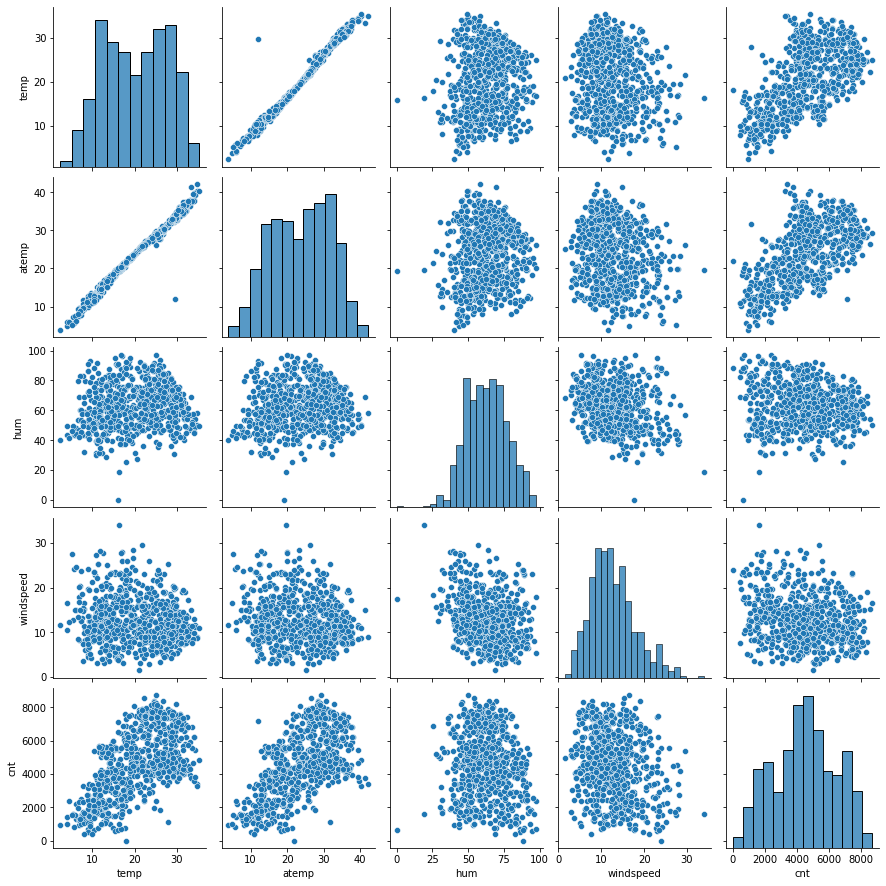

In [1055]:
#correlations between variables.
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

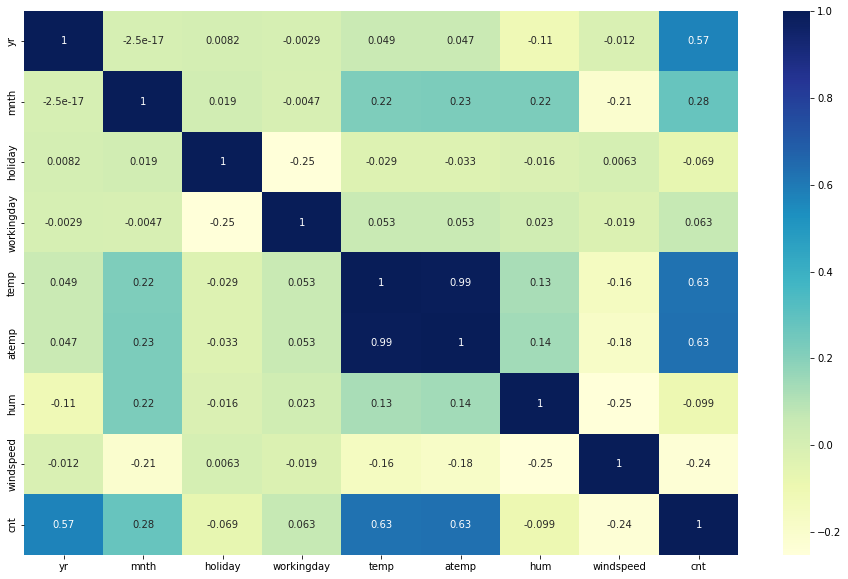

In [1056]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()



In [1057]:
#correlation between temp and atemp is 0.99 which is almost 1 so let us drop temp 

df.drop(['temp'],axis=1,inplace=True)
df.head()




,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


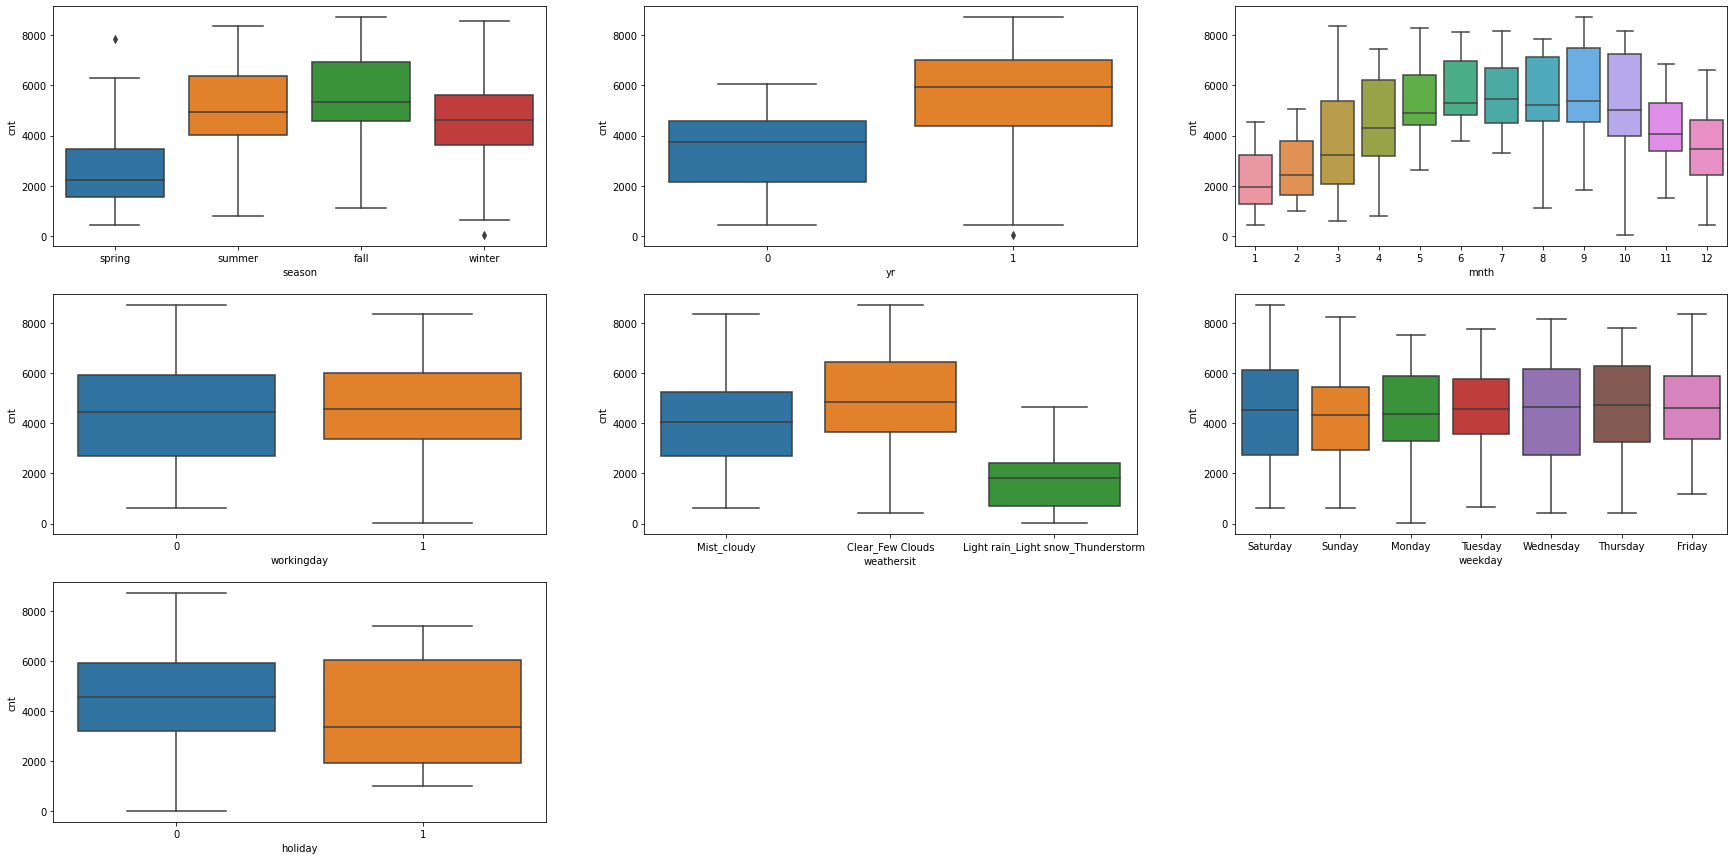

In [1058]:
#Visualising categorical Variables
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

#Creating dummy variables
df.info()

In [1059]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [1060]:
#Dummies for categorial data 

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [1061]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
#df.info()

In [1062]:
#Deleting the categorial string column
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1063]:
#Train  and split method
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1064]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1065]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1066]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [1067]:
#SCALING
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [1068]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1069]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1070]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1071]:
#X & Y
y_train = df_train.pop('cnt')
X_train = df_train

In [1072]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1073]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [1074]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE for Feature selection
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)           
rfe = rfe.fit(X_train, y_train)

In [1075]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 12),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 13),
 ('Wednesday', False, 15),
 (2, False, 7),
 (3, False, 5),
 (4, False, 4),
 (5, True, 1),
 (6, False, 3),
 (7, False, 8),
 (8, False, 2),
 (9, True, 1),
 (10, False, 6),
 (11, False, 10),
 (12, False, 11)]

In [1076]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          9],
      dtype='object')

In [1077]:
X_train.columns[~rfe.support_]

Index([   'summer',    'Monday',  'Thursday',   'Tuesday', 'Wednesday',
                 2,           3,           4,           6,           7,
                 8,          10,          11,          12],
      dtype='object')

In [1078]:
X_train_rfe = X_train[col]


In [1079]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [1080]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [1081]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.35e-186
Time:                        16:11:30   Log-Likelihood:                 503.01
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1082]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.69
10,Saturday,9.93
11,Sunday,9.65
6,spring,2.63
3,atemp,2.59
1,holiday,2.53
4,hum,1.94
7,winter,1.85
9,Mist_cloudy,1.57
8,Light rain_Light snow_Thunderstorm,1.26


In [1083]:
X_train_rfe1.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Saturday,Sunday,5,9
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0


In [1084]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [1085]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [1086]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [1087]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.35e-186
Time:                        16:11:30   Log-Likelihood:                 503.01
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1088]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.74
2,atemp,13.29
4,windspeed,3.96
5,spring,2.67
8,Mist_cloudy,2.26
6,winter,2.22
0,yr,2.05
11,5,1.29
7,Light rain_Light snow_Thunderstorm,1.23
9,Saturday,1.23


In [1089]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [1090]:
 
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.84e-184
Time:                        16:11:30   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     497   BIC:                            -909.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1091]:


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.00
3,windspeed,3.92
0,yr,2.05
4,spring,1.70
7,Mist_cloudy,1.53
5,winter,1.44
8,Saturday,1.23
9,Sunday,1.21
10,5,1.21
11,9,1.18


In [1092]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          9],
      dtype='object')

In [1093]:
#atemp has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [1094]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.10e-149
Time:                        16:11:30   Log-Likelihood:                 409.31
No. Observations:                 510   AIC:                            -794.6
Df Residuals:                     498   BIC:                            -743.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1095]:
#Saturday has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [1096]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.93e-150
Time:                        16:11:30   Log-Likelihood:                 409.11
No. Observations:                 510   AIC:                            -796.2
Df Residuals:                     499   BIC:                            -749.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1097]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,windspeed,2.68
0,yr,1.74
3,spring,1.58
6,Mist_cloudy,1.49
4,winter,1.43
8,5,1.16
7,Sunday,1.15
9,9,1.10
5,Light rain_Light snow_Thunderstorm,1.08
1,holiday,1.05


In [1098]:
#high VIF for windspeed
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [1099]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.94e-143
Time:                        16:11:30   Log-Likelihood:                 389.90
No. Observations:                 510   AIC:                            -759.8
Df Residuals:                     500   BIC:                            -717.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1100]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.48
5,Mist_cloudy,1.42
3,winter,1.33
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.09
4,Light rain_Light snow_Thunderstorm,1.05
1,holiday,1.04


In [1101]:
#ADDING SATURDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,Saturday
653,1,0,0,1,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,1
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,1


In [1102]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.44e-142
Time:                        16:11:31   Log-Likelihood:                 389.95
No. Observations:                 510   AIC:                            -757.9
Df Residuals:                     499   BIC:                            -711.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1103]:
#working has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)



In [1104]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.94e-143
Time:                        16:11:31   Log-Likelihood:                 389.90
No. Observations:                 510   AIC:                            -759.8
Df Residuals:                     500   BIC:                            -717.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1105]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.48
5,Mist_cloudy,1.42
3,winter,1.33
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.09
4,Light rain_Light snow_Thunderstorm,1.05
1,holiday,1.04


In [1106]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,2
653,1,0,0,1,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,0


In [1107]:

X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.50e-142
Time:                        16:11:31   Log-Likelihood:                 389.92
No. Observations:                 510   AIC:                            -757.8
Df Residuals:                     499   BIC:                            -711.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1108]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [1109]:

X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.94e-143
Time:                        16:11:31   Log-Likelihood:                 389.90
No. Observations:                 510   AIC:                            -759.8
Df Residuals:                     500   BIC:                            -717.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1110]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.48
5,Mist_cloudy,1.42
3,winter,1.33
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.09
4,Light rain_Light snow_Thunderstorm,1.05
1,holiday,1.04


In [1111]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,7
653,1,0,0,1,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,1
426,1,0,1,0,0,1,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,0


In [1112]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     149.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.86e-143
Time:                        16:11:31   Log-Likelihood:                 391.41
No. Observations:                 510   AIC:                            -760.8
Df Residuals:                     499   BIC:                            -714.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1113]:
#dropping 7 as p-value
X_train_rfe=X_train_rfe.drop([7],axis=1)

In [1114]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.48
5,Mist_cloudy,1.42
3,winter,1.33
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.09
4,Light rain_Light snow_Thunderstorm,1.05
1,holiday,1.04


In [1115]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()



,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,10
653,1,0,0,1,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,0


In [1116]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.95e-147
Time:                        16:11:31   Log-Likelihood:                 400.56
No. Observations:                 510   AIC:                            -779.1
Df Residuals:                     499   BIC:                            -732.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1117]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.83
9,10,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
4,Light rain_Light snow_Thunderstorm,1.07
1,holiday,1.04


In [1118]:
# WE WILL DROP MONTH 10
X_train_rfe=X_train_rfe.drop([10],axis=1)

In [1119]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11
653,1,0,0,1,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,0


In [1120]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:31   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1121]:

X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:31   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1122]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.88
9,11,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.05


In [1123]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11,12
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,1
482,1,0,0,0,0,1,0,0,0,0,0


In [1124]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.62e-147
Time:                        16:11:31   Log-Likelihood:                 403.55
No. Observations:                 510   AIC:                            -783.1
Df Residuals:                     498   BIC:                            -732.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1125]:
#We see high p-value for 12 so we drop it

X_train_rfe=X_train_rfe.drop([12],axis=1)


In [1126]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:32   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1127]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.88
9,11,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.05


In [1128]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11,Monday
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0


In [1129]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     138.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.30e-144
Time:                        16:11:32   Log-Likelihood:                 396.17
No. Observations:                 510   AIC:                            -768.3
Df Residuals:                     498   BIC:                            -717.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1130]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [1131]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:32   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1132]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.88
9,11,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.05


In [1133]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()


,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11,Tuesday
653,1,0,0,1,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0


In [1134]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.65e-143
Time:                        16:11:32   Log-Likelihood:                 394.84
No. Observations:                 510   AIC:                            -765.7
Df Residuals:                     498   BIC:                            -714.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1135]:
# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)


In [1136]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:32   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1137]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.88
9,11,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.05


In [1138]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11,Wednesday
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0


In [1139]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.13e-143
Time:                        16:11:32   Log-Likelihood:                 395.06
No. Observations:                 510   AIC:                            -766.1
Df Residuals:                     498   BIC:                            -715.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1140]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)



In [1141]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
print(lm24.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:32   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1142]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.88
9,11,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.05


In [1143]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11,Thursday
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,0


In [1144]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.92e-143
Time:                        16:11:32   Log-Likelihood:                 394.74
No. Observations:                 510   AIC:                            -765.5
Df Residuals:                     498   BIC:                            -714.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1145]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [1146]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
print(lm26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:32   Log-Likelihood:                 394.73
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1147]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,1.88
9,11,1.57
0,yr,1.48
5,Mist_cloudy,1.42
2,spring,1.28
6,Sunday,1.13
7,5,1.11
8,9,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.05


## We have considered all columns and checked.Now we stop the model building and check on which model can we choose
## Out all the models model lm14 seems to give good result so we choose it.

In [1148]:
#Predict values
y_train_cnt = lm24.predict(X_train_rfe24)

In [1149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1150]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

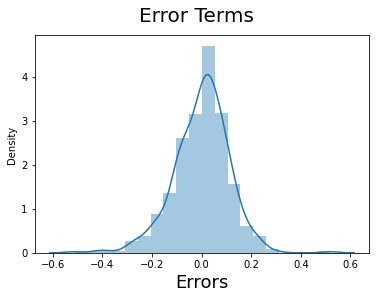

In [1151]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1152]:
#Checking columns
X_train_rfe24.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Sunday',
                                          5,
                                          9,
                                         11],
      dtype='object')

In [1153]:
print(X_train_rfe24.shape)
print(res.shape)
df_test.head()

(510, 11)
(510,)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1154]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1155]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [1169]:
X_train_new=X_train_rfe24.drop(['const'], axis=1)
X_train_new.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11
653,1,0,0,1,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,0


In [1170]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1158]:
X_train_rfe24.columns
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [1159]:
#Making predictions on the chosen model

y_pred = lm24.predict(X_test_new)
y_pred.head(5)

184    0.311495
535    0.755943
299    0.391989
221    0.508588
152    0.508588
dtype: float64

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.


In [1160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [1161]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11681495093901756

In [1162]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7594123566105414

In [1163]:
#R square of our model is 79.7

In [1164]:
X_t=X_train_new.iloc[:,0].values

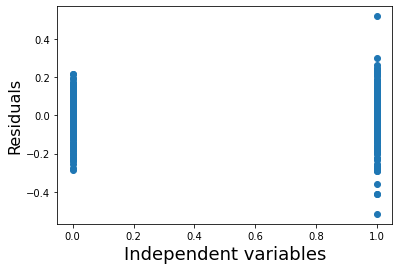

In [1165]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [1166]:
X_train_new.head()

,yr,holiday,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,9,11
653,1,0,0,1,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,0,0,0,0
728,1,0,1,0,0,0,1,0,0,0
482,1,0,0,0,0,1,0,0,0,0


In [1167]:
print(X_train_rfe24.columns)
print(lm24.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Sunday',
                                          5,
                                          9,
                                         11],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.32e-144
Time:                        16:11:33   Log-Likelihood:                 394.73
No. Obse